<a href="https://colab.research.google.com/github/cipi999/Colab/blob/main/DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

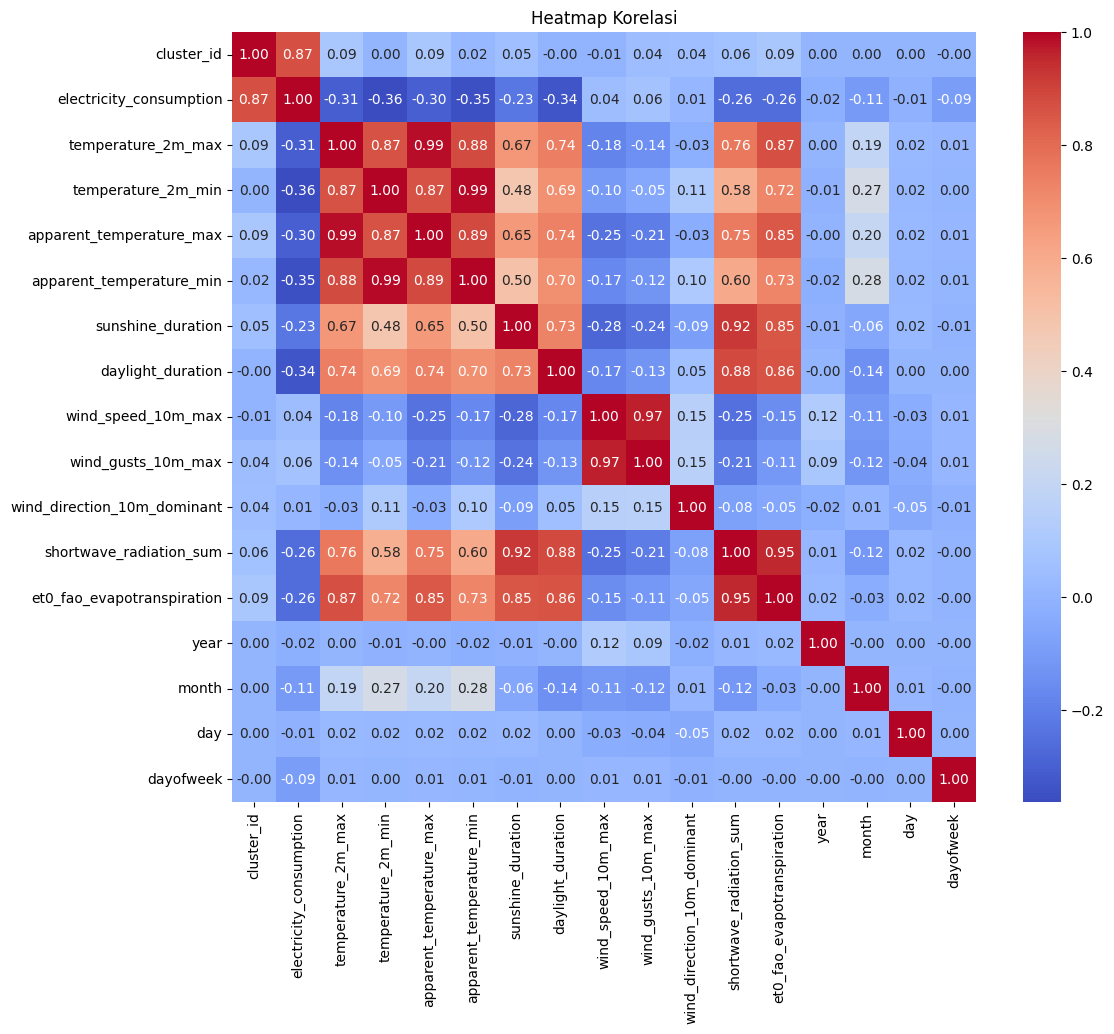

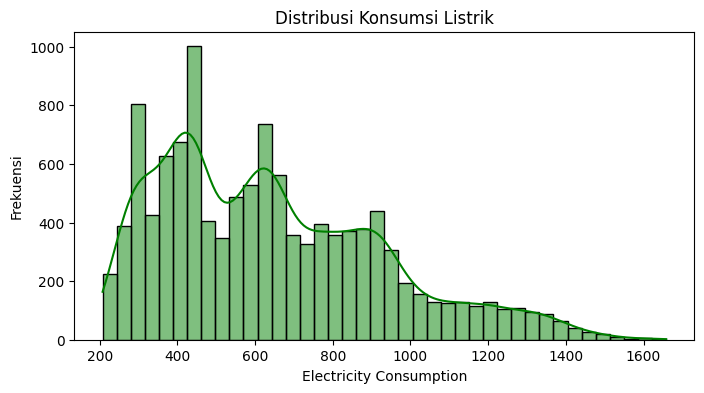

MAE: 57.41
RMSE: 74.48
✅ File 'submission_linear.csv' berhasil disimpan!


In [ ]:
# =========================================
# STEP 1: Import Library
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# =========================================
# STEP 2: Load Dataset
# =========================================
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

# =========================================
# STEP 3: Preprocessing
# =========================================
# Konversi date ke datetime
for df in [train, test]:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek

# Encode cluster_id
le = LabelEncoder()
train['cluster_id'] = le.fit_transform(train['cluster_id'])
test['cluster_id'] = le.transform(test['cluster_id'])

# =========================================
# STEP 4: EDA (Exploratory Data Analysis)
# =========================================

# Korelasi antar fitur numerik
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

# Distribusi target
plt.figure(figsize=(8, 4))
sns.histplot(train['electricity_consumption'], kde=True, bins=40, color='green')
plt.title("Distribusi Konsumsi Listrik")
plt.xlabel("Electricity Consumption")
plt.ylabel("Frekuensi")
plt.show()

# =========================================
# STEP 5: Modeling dengan Linear Regression
# =========================================

# Pisahkan fitur dan target
X = train.drop(columns=['ID', 'date', 'electricity_consumption'])
y = train['electricity_consumption']
X_test = test.drop(columns=['ID', 'date'])

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train/Test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi validasi
y_pred = model.predict(X_val)

# Evaluasi model
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# =========================================
# STEP 6: Final Prediction & Submission
# =========================================
# Prediksi test set
y_test_pred = model.predict(X_test_scaled)

# Masukkan hasil ke format submission
submission['electricity_consumption'] = y_test_pred
submission.to_csv('submission_linear.csv', index=False)
print("✅ File 'submission_linear.csv' berhasil disimpan!")


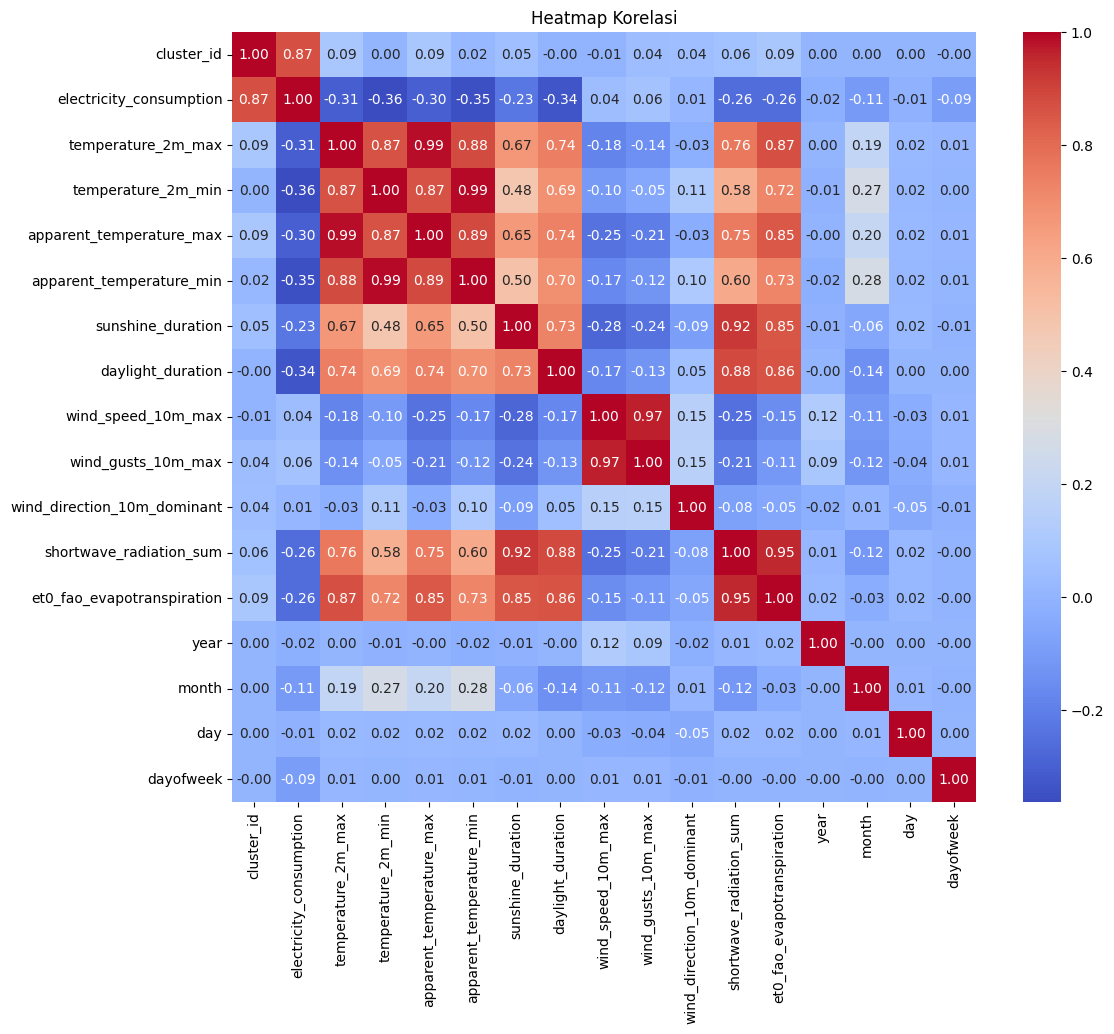

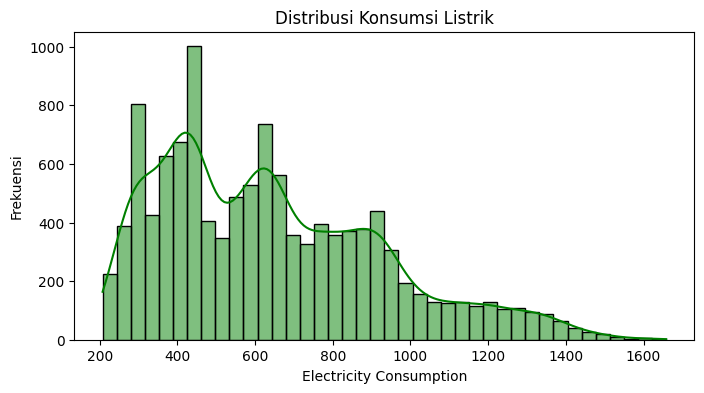

[Random Forest] MAE: 20.56
[Random Forest] RMSE: 31.00
✅ File 'submission_random_forest.csv' berhasil disimpan!


In [ ]:
# =========================================
# STEP 1: Import Libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# =========================================
# STEP 2: Load Dataset
# =========================================
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

# =========================================
# STEP 3: Preprocessing
# =========================================
# Ubah kolom 'date' menjadi tipe datetime dan ekstrak fitur tanggal
for df in [train, test]:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek

# Label Encoding untuk 'cluster_id'
le = LabelEncoder()
train['cluster_id'] = le.fit_transform(train['cluster_id'])
test['cluster_id'] = le.transform(test['cluster_id'])

# Pisahkan fitur dan target
X = train.drop(columns=['ID', 'date', 'electricity_consumption'])
y = train['electricity_consumption']
X_test = test.drop(columns=['ID', 'date'])

# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# =========================================
# STEP 4: EDA (Exploratory Data Analysis)
# =========================================
# Heatmap korelasi
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

# Distribusi target
plt.figure(figsize=(8, 4))
sns.histplot(train['electricity_consumption'], kde=True, bins=40, color='green')
plt.title("Distribusi Konsumsi Listrik")
plt.xlabel("Electricity Consumption")
plt.ylabel("Frekuensi")
plt.show()

# =========================================
# STEP 5: Modeling dengan Random Forest
# =========================================
# Split data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data validasi
y_pred = rf_model.predict(X_val)

# Evaluasi
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"[Random Forest] MAE: {mae:.2f}")
print(f"[Random Forest] RMSE: {rmse:.2f}")

# =========================================
# STEP 6: Prediksi & Simpan Submission
# =========================================
# Prediksi test set
y_test_pred = rf_model.predict(X_test_scaled)

# Masukkan prediksi ke file submission
submission['electricity_consumption'] = y_test_pred
submission.to_csv('submission_random_forest.csv', index=False)
print("✅ File 'submission_random_forest.csv' berhasil disimpan!")


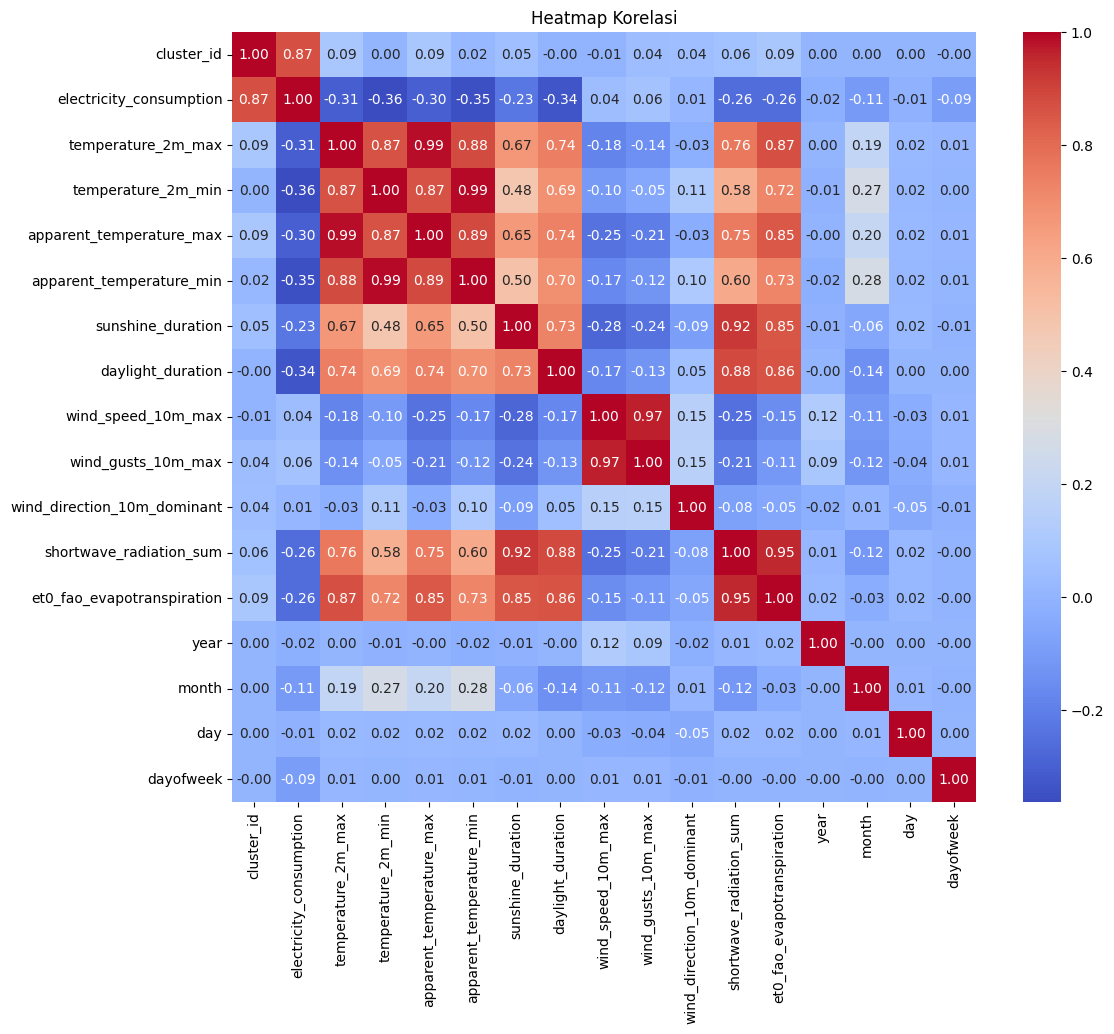

Fitting 3 folds for each of 48 candidates, totalling 144 fits


KeyboardInterrupt: 

In [ ]:
# =========================================
# STEP 1: Import Libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# =========================================
# STEP 2: Load Data
# =========================================
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

# =========================================
# STEP 3: Preprocessing
# =========================================
for df in [train, test]:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek

le = LabelEncoder()
train['cluster_id'] = le.fit_transform(train['cluster_id'])
test['cluster_id'] = le.transform(test['cluster_id'])

X = train.drop(columns=['ID', 'date', 'electricity_consumption'])
y = train['electricity_consumption']
X_test = test.drop(columns=['ID', 'date'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# =========================================
# STEP 4: EDA (Optional Tapi Berguna)
# =========================================
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

# =========================================
# STEP 5: Split Data
# =========================================
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =========================================
# STEP 6: Hyperparameter Tuning (Grid Search)
# =========================================
param_grid = {
    'n_estimators': [5, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("📌 Best Params:", grid_search.best_params_)

# =========================================
# STEP 7: Evaluasi Model Terbaik
# =========================================
best_model = grid_search.best_estimator_

# Prediksi validasi
y_val_pred = best_model.predict(X_val)

mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"✅ Final MAE (best RF): {mae:.2f}")
print(f"✅ Final RMSE (best RF): {rmse:.2f}")

# =========================================
# STEP 8: Final Submission
# =========================================
y_test_pred = best_model.predict(X_test_scaled)
submission['electricity_consumption'] = y_test_pred
submission.to_csv('submission_best_rf.csv', index=False)
print("✅ File 'submission_best_rf.csv' berhasil disimpan!")


In [ ]:
# =========================================
# STEP 1: Import Libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import randint

# =========================================
# STEP 2: Load Dataset
# =========================================
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

# =========================================
# STEP 3: Preprocessing
# =========================================
for df in [train, test]:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek

le = LabelEncoder()
train['cluster_id'] = le.fit_transform(train['cluster_id'])
test['cluster_id'] = le.transform(test['cluster_id'])

X = train.drop(columns=['ID', 'date', 'electricity_consumption'])
y = train['electricity_consumption']
X_test = test.drop(columns=['ID', 'date'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# =========================================
# STEP 4: Split Data
# =========================================
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =========================================
# STEP 5: Randomized Search CV
# =========================================
# Parameter space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Random Search
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

print("📌 Best Params:", random_search.best_params_)

# =========================================
# STEP 6: Evaluasi Model Terbaik
# =========================================
best_model = random_search.best_estimator_

y_val_pred = best_model.predict(X_val)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"✅ Final MAE (Random Search RF): {mae:.2f}")
print(f"✅ Final RMSE (Random Search RF): {rmse:.2f}")

# =========================================
# STEP 7: Final Prediction & Submission
# =========================================
y_test_pred = best_model.predict(X_test_scaled)
submission['electricity_consumption'] = y_test_pred
submission.to_csv('submission_random_search_rf.csv', index=False)
print("✅ File 'submission_random_search_rf.csv' berhasil disimpan!")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
📌 Best Params: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 287}
✅ Final MAE (Random Search RF): 20.75
✅ Final RMSE (Random Search RF): 31.41
✅ File 'submission_random_search_rf.csv' berhasil disimpan!


In [ ]:
# =========================
# STEP 1: IMPORT LIBRARY
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import randint

# =========================
# STEP 2: LOAD & PREPROCESS
# =========================
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

for df in [train, test]:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek

le = LabelEncoder()
train['cluster_id'] = le.fit_transform(train['cluster_id'])
test['cluster_id'] = le.transform(test['cluster_id'])

X = train.drop(columns=['ID', 'date', 'electricity_consumption'])
y = train['electricity_consumption']
X_test = test.drop(columns=['ID', 'date'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =========================
# STEP 3: RANDOM SEARCH (EXPLORASI)
# =========================
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # tidak terlalu besar
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
print("🔍 Random Search Best Params:", best_params_random)

# =========================
# STEP 4: GRID SEARCH (PENYEMPURNAAN)
# =========================
# Buat grid di sekitar best_params_random
param_grid = {
    'n_estimators': [best_params_random['n_estimators'] - 20,
                     best_params_random['n_estimators'],
                     best_params_random['n_estimators'] + 20],
    'max_depth': [best_params_random['max_depth']],
    'min_samples_split': [best_params_random['min_samples_split']],
    'min_samples_leaf': [best_params_random['min_samples_leaf']],
    'max_features': [best_params_random['max_features']]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("✅ Final Best Params (Grid Search):", grid_search.best_params_)

# =========================
# STEP 5: EVALUASI MODEL
# =========================
y_val_pred = best_model.predict(X_val)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"📊 MAE: {mae:.2f}")
print(f"📊 RMSE: {rmse:.2f}")

# =========================
# STEP 6: SUBMISSION
# =========================
y_test_pred = best_model.predict(X_test_scaled)
submission['electricity_consumption'] = y_test_pred
submission.to_csv('submission_hybrid_rf.csv', index=False)
print("📁 File 'submission_hybrid_rf.csv' berhasil disimpan!")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Random Search Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 171}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✅ Final Best Params (Grid Search): {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 171}
📊 MAE: 25.81
📊 RMSE: 36.22
📁 File 'submission_hybrid_rf.csv' berhasil disimpan!
